In [1]:
import numpy as np
from pydae.urisi.utils import report_v,get_v,get_i,get_power
from pydae.urisi.lines import change_line
import matplotlib.pyplot as plt
from pydae.svg_tools import svg,grid2svg
from IPython.core.display import HTML,SVG

In [2]:
import cigre_eu_lv_com

In [4]:
model = cigre_eu_lv_com.model()

p_load,q_load = 50e3,10e3
params = {'p_load_R18_a':p_load/3,'q_load_R18_a':q_load/3,
          'p_load_R18_b':p_load/3,'q_load_R18_b':q_load/3,
          'p_load_R18_c':p_load/3,'q_load_R18_c':q_load/3}

model.ini(params,'xy_0.json')
report_v(model,'cigre_eu_lv_com.hjson');


Input or parameter p_load_R18_a not found.
Input or parameter q_load_R18_a not found.
Input or parameter p_load_R18_b not found.
Input or parameter q_load_R18_b not found.
Input or parameter p_load_R18_c not found.
Input or parameter q_load_R18_c not found.
V_MV0_an: 11546.6|   -0.0º V,    V_MV0_ag: 11546.6|   -0.0º V,    V_1 = 11546.6 V, unb = 0.00%
V_MV0_bn: 11546.6| -120.0º V,    V_MV0_bg: 11546.6| -120.0º V,    V_2 =     0.0 V
V_MV0_cn: 11546.6|  120.0º V,    V_MV0_cg: 11546.6|  120.0º V,    v_0 =     0.0 V
  V_MV0_ng:      0.0|      0.0º V
V_C01_an:   225.7|  -31.5º V,    V_C01_ag:   225.4|  -31.6º V,    V_1 =   225.7 V, unb = 0.01%
V_C01_bn:   225.7| -151.5º V,    V_C01_bg:   226.0| -151.6º V,    V_2 =     0.0 V
V_C01_cn:   225.7|   88.5º V,    V_C01_cg:   225.8|   88.6º V,    v_0 =     0.4 V
  V_C01_ng:      0.3|    173.8º V
V_C02_an:   223.2|  -31.6º V,    V_C02_ag:   223.1|  -31.6º V,    V_1 =   223.6 V, unb = 0.27%
V_C02_bn:   223.8| -151.6º V,    V_C02_bg:   223.9| -151.6º V

In [5]:
s = svg('./cigre_eu_lv_com.svg')
s.set_grid(model,'cigre_eu_lv_com.hjson')
s.set_tooltips(f'./cigre_eu_lv_com_results.svg')    

SVG('./cigre_eu_lv_com_results.svg')

SVG element MV0 not found
No trafo trafo_MV0_C01_1 found
No trafo trafo_MV0_C01_2 found


UnboundLocalError: cannot access local variable 'trafo_elm' where it is not associated with a value

In [11]:
P = []
V = []
for p_R18 in np.arange(50e3,-50e3, -10e3):
    model = cigre_eu_lv_res.model()

    q_R18 = p_R18*0.2
    p_load,q_load = p_R18,q_R18
    params = {'p_load_R18_a':p_load/3,'q_load_R18_a':q_load/3,
              'p_load_R18_b':p_load/3,'q_load_R18_b':q_load/3,
              'p_load_R18_c':p_load/3,'q_load_R18_c':q_load/3}

    model.ini(params,'xy_0.json')
    V_R18 = get_v(model,'R18')
    print(f"Power = {-p_R18/1e3:5.1f} kW, Voltage = {V_R18:0.1f} V")
    P += [p_R18]
    V += [V_R18]

Power = -50.0 kW, Voltage = 210.3 V
Power = -40.0 kW, Voltage = 212.0 V
Power = -30.0 kW, Voltage = 213.7 V
Power = -20.0 kW, Voltage = 215.3 V
Power = -10.0 kW, Voltage = 217.0 V
Power =  -0.0 kW, Voltage = 218.5 V
Power =  10.0 kW, Voltage = 220.1 V
Power =  20.0 kW, Voltage = 221.6 V
Power =  30.0 kW, Voltage = 223.2 V
Power =  40.0 kW, Voltage = 224.7 V


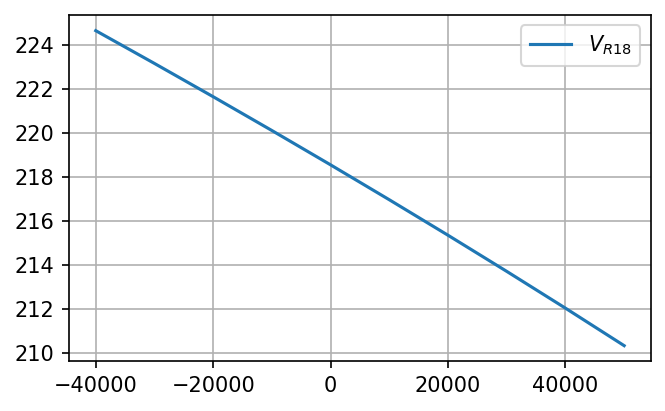

In [18]:
plt.close('all')
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(5, 3), frameon=False, dpi=150)

axes.plot(P, V, label=f'$V_{{R18}}$')
axes.legend()
axes.grid(True)